
# Project: Investigate "No-show appointments" Dataset 
## (Why patients miss their appointments?)
---

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">1) Assessing Data and Data Wrangling</a></li>
<li><a href="#GE">2) General Exploration of the dataset</a></li>
<li><a href="#eda">3) Exploratory Data Analysis</a></li>
<li><a href="#conclusions">4) Conclusions</a></li>
<li><a href="#lim">5) limitation</a></li>    

</ul>

<a id='intro'></a>
## Introduction
This dataset contain 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment and a number of characteristics about the patients who make the appointments.
The variables of the dataset:



|Column|Description|
|-------|-------|
|PatientId|Identification of a patient|
|AppointmentID |Identification of each appointment|
|Gender|Male or Female.|
|ScheduledDay|The day someone called or registered the appointment.|
|AppointmentDay|The day of the actuall appointment, when they have to visit the doctor.|
|Age|How old is the patient.|
|Neighbourhood|Where the appointment takes place.|
|Scholarship|True of False|
|Hipertension|True or False|
|Diabetes|True or False|
|Alcoholism|True or False|
|Handcap|True or False|
|SMS_received|messages sent to the patient.|
|No-show|True or False|


##### **The questions to be explored:**
- **Q1- Is there a correlation between missing the appointment and the age of the patient?**
- **Q2- Is there a correlation between missing the appointment and the Gender of the patient?**
- **Q3- Is there a correlation between missing the appointment and the Neighbourhood?**
- **Q4- Is there a correlation between missing the appointment and not receiving an SMS message?**


### Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print("---Importing Done!!---")

---Importing Done!!---


### General Properties

In [2]:
# loading the dataset
df = pd.read_csv("../input/noshowappointments/KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


___
<a id='wrangling'></a>
# 1) Assessing Data and Data Wrangling
- (a) Dataset shape
- (b) Columns data types
- (c) Missing values
- (d) Incorrect values
- (e) Duplicates

### (a) Dataset shape and types

In [3]:
df.shape

(110527, 14)

**The dataset has:**
- 110,527 record
- 14 column
---


### (b) Colums data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset has two columns with incorrect types
- ScheduledDay
- AppointmentDay

So, we wil convert them to datetime types

In [5]:
# Convert ScheduledDay to datetime type
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.ScheduledDay.head(2)

0   2016-04-29 18:38:08+00:00
1   2016-04-29 16:08:27+00:00
Name: ScheduledDay, dtype: datetime64[ns, UTC]

In [6]:
# Convert ScheduledDay to datetime type
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)
df.AppointmentDay.head(2)

0   2016-04-29 00:00:00+00:00
1   2016-04-29 00:00:00+00:00
Name: AppointmentDay, dtype: datetime64[ns, UTC]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

---

### (c) Missing Values

In [8]:
df.describe(include="all");

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


- **There is no missing values in the dataset**
---

### (d) Incorrect Values
As in describe above there is 2 colums that may have a incorrect values:
- Age : (the min value is -1)
- Handcap : (the max value is 4)

So we will investigate them more.

#### investigating Age :

In [9]:
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

- There is just 1 value = -1 : We will drop it.

In [10]:
df.drop(df.query("Age == -1").index,inplace=True)

In [11]:
# Check Age
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

#### investigating Handcap :
Handcap column has values from 1 to 4

In [12]:
df.Handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

**By doing some research on the dataset page:**

Question regarding to Handcap : https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699
- "... the handcap refers to the number of desabilites a person has.For example, if the person is blind and can't walk the total is 2."

   ***will take notice of it if we decide use it.***
---

### (e) Duplicates
Investigate if there is duplicate records in the dataset

In [13]:
df.duplicated().sum()

0

In [14]:
# Check if there is rows with the same only patient id and appointment id
df.duplicated(["PatientId","AppointmentID"]).sum()

0

> **There is no duplicate values in the dataset**

---

---
## Assessing and cleaning Results:
- The dataset has 110,527 records and 14 columns.
- The data columns (ScheduledDay, AppointmentDay) needed to be converted to datetime data type
- There were no missing values in the dataset.
- The Age column has one value that was equal to -1 and we dropped the row that contained it.
- The Handcap column has more than two values and with some research, we found that it refers to the number of disabilities a person has.
- The dataset has no duplicates rows.


---
---

<a id='GE'></a>
# 2) General Exploration of the dataset
We will start by doing general exploration for the dataset 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

---
### The ratio between males and females

F    65.0
M    35.0
Name: Gender, dtype: float64


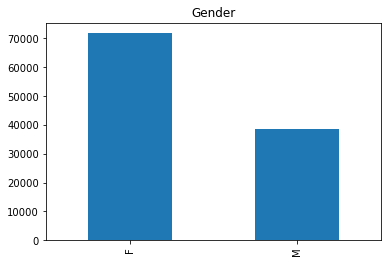

In [16]:
print(round(df.Gender.value_counts()/len(df)*100))
#
df.Gender.value_counts().plot(kind="bar")
plt.title("Gender");

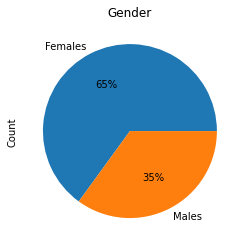

In [17]:
df["Gender"].value_counts().plot(kind="pie",labels=["Females","Males"],   autopct='%1.0f%%')
plt.ylabel("Count")
plt.title("Gender");

In [18]:
print("The ratio of females to males : (",(df.Gender == "F").sum() ,":", (df.Gender == "M").sum() ,") -> ", round((df.Gender == "F").sum() / (df.Gender == "M").sum(),2),sep="" )

The ratio of females to males : (71839:38687) -> 1.86


> **The proportion of females is greater than that of males** (the number of females is near twice the number of men)

---
### The period in which the data is collected
- Explorting (ScheduledDay, AppointmentDay) columns

In [19]:
df[["ScheduledDay","AppointmentDay"]].describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,ScheduledDay,AppointmentDay
count,110526,110526
unique,103548,27
top,2016-05-06 07:09:54+00:00,2016-06-06 00:00:00+00:00
freq,24,4691
first,2015-11-10 07:13:56+00:00,2016-04-29 00:00:00+00:00
last,2016-06-08 20:07:23+00:00,2016-06-08 00:00:00+00:00


In [20]:
# the unique values for date and time parts for 'AppointmentDay'
df.AppointmentDay.dt.date.value_counts().count() , df.AppointmentDay.dt.time.value_counts().count()

(27, 1)

In [21]:
# the unique values for date and time parts for 'ScheduledDay'
df.ScheduledDay.dt.date.value_counts().count() , df.ScheduledDay.dt.time.value_counts().count() 

(111, 37109)

- **AppointmentDay** :
    - 2016-04-29 -> 2016-06-08
    - 27 unique value
    - There is no time part (all = 00:00:00)
    
    
- **ScheduledDay** :
    - 2015-11-10 -> 2016-06-08
    - 111 unique date value
    - There is time part for each record

Text(0.5, 1.0, "'ScheduledDay' Line chart")

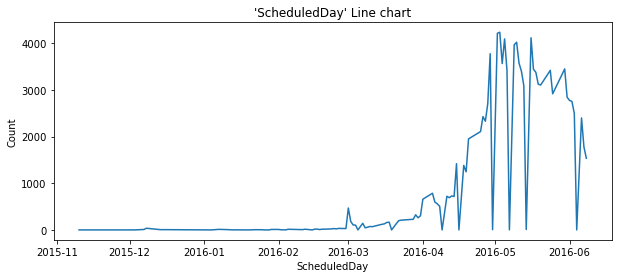

In [22]:
# line chart plot for 'ScheduledDay'
df.ScheduledDay.dt.date.value_counts().plot(kind="line",figsize=(10,4));
plt.xlabel("ScheduledDay")
plt.ylabel("Count")
plt.title("'ScheduledDay' Line chart")

Text(0.5, 1.0, "'ScheduledDay' Histogram")

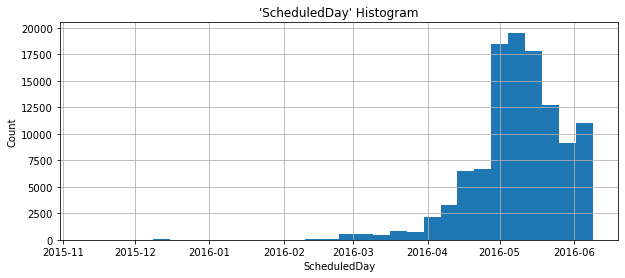

In [23]:
# histogram plot for 'ScheduledDay'
df.ScheduledDay.hist(bins=30,figsize=(10,4));
plt.xlabel("ScheduledDay")
plt.ylabel("Count")
plt.title("'ScheduledDay' Histogram")

Text(0.5, 1.0, "'AppointmentDay' Line chart")

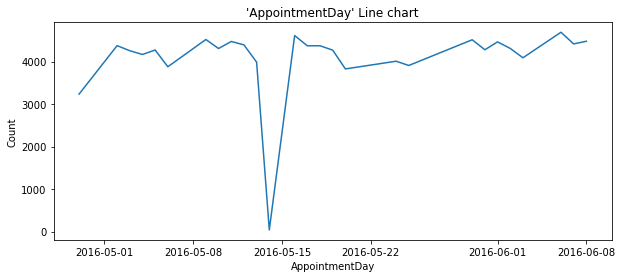

In [24]:
# line chart plot for 'ScheduledDay'
df.AppointmentDay.dt.date.value_counts().plot(kind="line",figsize=(10,4));
plt.xlabel("AppointmentDay")
plt.ylabel("Count")
plt.title("'AppointmentDay' Line chart")

Text(0.5, 1.0, "'AppointmentDay' Histogram")

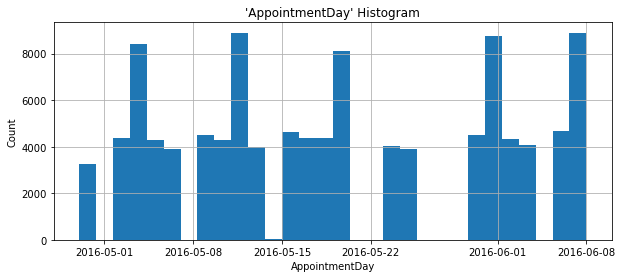

In [25]:
# # histogram for 'AppointmentDay'
df.AppointmentDay.hist(bins=30,figsize=(10,4));
plt.xlabel("AppointmentDay")
plt.ylabel("Count")
plt.title("'AppointmentDay' Histogram")

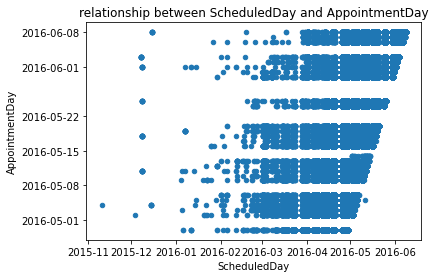

In [26]:
# Scatter plot for the relationship between ScheduledDay and AppointmentDay
df.plot(kind="scatter", x="ScheduledDay",y="AppointmentDay");
plt.title("relationship between ScheduledDay and AppointmentDay");

---
### Age Exploration

In [27]:
# Basic info about Age
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

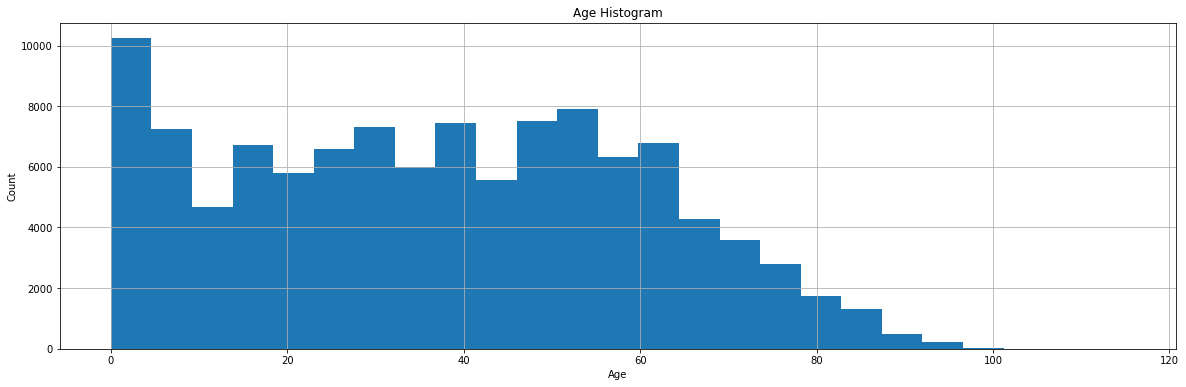

In [28]:
# Histogram plot of Age
df.Age.hist(bins=25,figsize=(20,6)) 
plt.xlabel("Age") 
plt.ylabel("Count") 
plt.title("Age Histogram");

In [29]:
#df.Age.plot(kind="pie")

---
### Neighbourhood


In [30]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

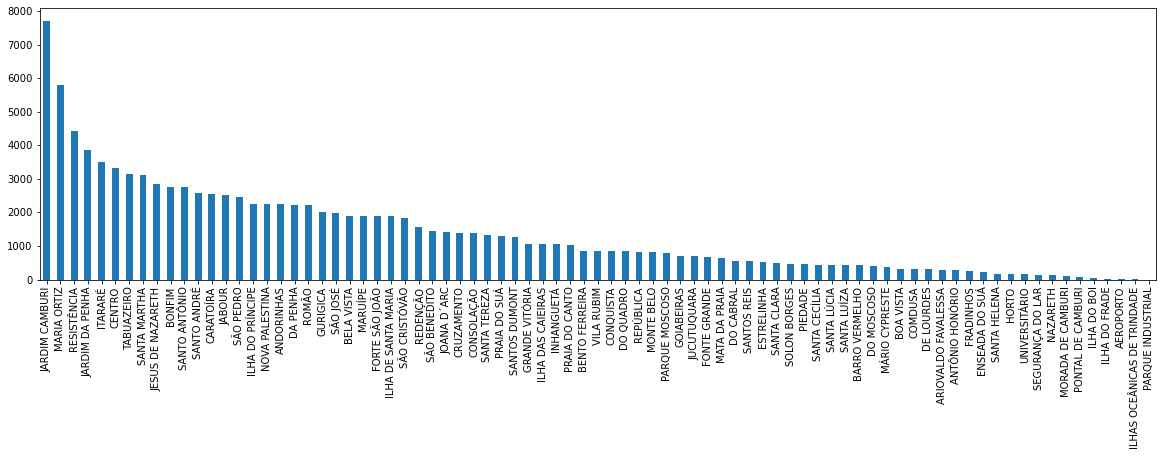

In [31]:
df.Neighbourhood.value_counts().plot(kind="bar",figsize=(20,5));

---

In [32]:
# function to find the value counts percentage and plot barplot figure
def percent_and_barplot(col):
    print(round(df[col].value_counts()/len(df)*100,2))
    df[col].value_counts().plot(kind="bar")
    plt.ylabel("Count")
    plt.title(col);

---
### Scholarship

0    90.17
1     9.83
Name: Scholarship, dtype: float64


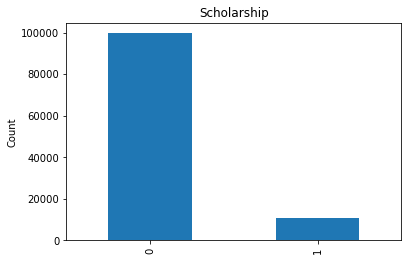

In [33]:
percent_and_barplot("Scholarship")

---

### Hipertension

0    80.28
1    19.72
Name: Hipertension, dtype: float64


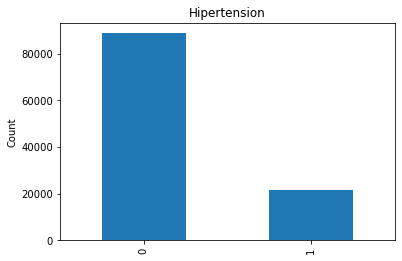

In [34]:
percent_and_barplot("Hipertension")

### Diabetes

0    92.81
1     7.19
Name: Diabetes, dtype: float64


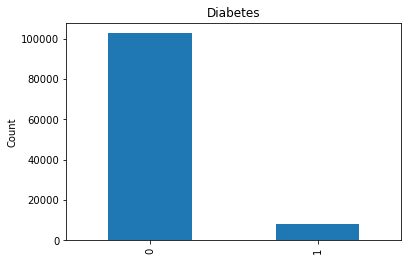

In [35]:
percent_and_barplot("Diabetes");

### Alcoholism

0    96.96
1     3.04
Name: Alcoholism, dtype: float64


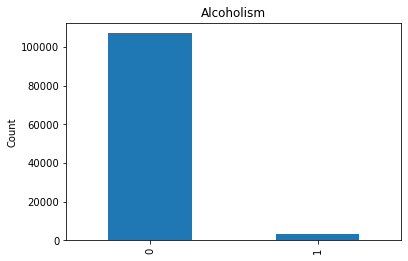

In [36]:
percent_and_barplot("Alcoholism");

### Handcap

0    97.97
1     1.85
2     0.17
3     0.01
4     0.00
Name: Handcap, dtype: float64


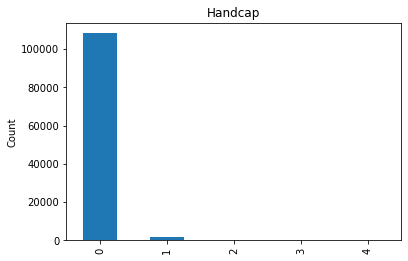

In [37]:
percent_and_barplot("Handcap");

---
### SMS_received

0    67.9
1    32.1
Name: SMS_received, dtype: float64


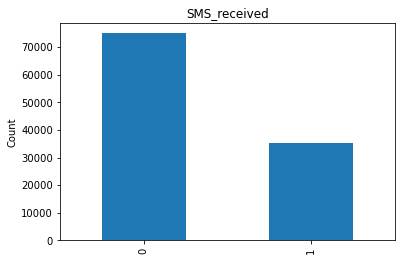

In [38]:
percent_and_barplot("SMS_received");

---
### No-show

No     79.81
Yes    20.19
Name: No-show, dtype: float64


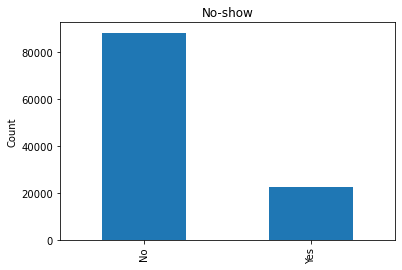

In [39]:
percent_and_barplot("No-show");

---
## General Exploration Results:
- **The proportion of females is greater than that of males**.
- the period of time is starting from **2015-11-10** for **scheduling** dates and from **2016-04-29** for **appointments** untill -> **2016-06-08**.
- The Age range is contain nearly **all ages** (from 0 to 115) and the majority is in very young age and between 20 and 55.
- There is **81 neighbourhood** where the appointment takes place.
- Most of the patients have **No** : Scholarship 90% , Hipertension 80%, Diabetes 93% , Alcoholism 97% , Handcap 98% (('according to the data')).
- 68% of patients did not received SMS.
- **Nearly 20% of patient missed their appointment**.
---
---

<a id='eda'></a>
# 3) Exploratory Data Analysis

The main goal of this analysis is to find why patients miss their appointment.
and this will be done by finding the relationships between the patients who missed and Attended their appointment and the other charactrestics in the dataset.

- **Q1- Is there a correlation between missing the appointment and the age of the patient?**
- **Q2- Is there a correlation between missing the appointment and the Gender of the patient?**
- **Q3- Is there a correlation between missing the appointment and the Neighbourhood?**
- **Q4- Is there a correlation between missing the appointment and not receiving an SMS message?**

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

In [41]:
# making masks to use later
miss = df["No-show"] == "Yes"
show = df["No-show"] == "No"

---
### Q1- Is there a correlation between missing the appointment and the age of the patient?

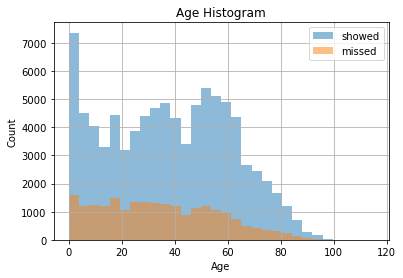

In [42]:
# histogram for ages of patients
df[show].Age.hist(alpha=0.5, bins=30,label="showed")
df[miss].Age.hist(alpha=0.5, bins=30,label="missed")
plt.legend();
plt.title("Age Histogram")
plt.xlabel("Age")
plt.ylabel("Count");

In [43]:
# value counts for no-show grouped by Age
Age_count = df.groupby("Age")["No-show"].value_counts()
Age_count

Age  No-show
0    No         2900
     Yes         639
1    No         1858
     Yes         415
2    No         1366
                ... 
99   No            1
100  No            4
102  No            2
115  Yes           3
     No            2
Name: No-show, Length: 203, dtype: int64

In [44]:
# value counts for Age
Age_count.groupby(level=0).sum()

Age
0      3539
1      2273
2      1618
3      1513
4      1299
       ... 
98        6
99        1
100       4
102       2
115       5
Name: No-show, Length: 103, dtype: int64

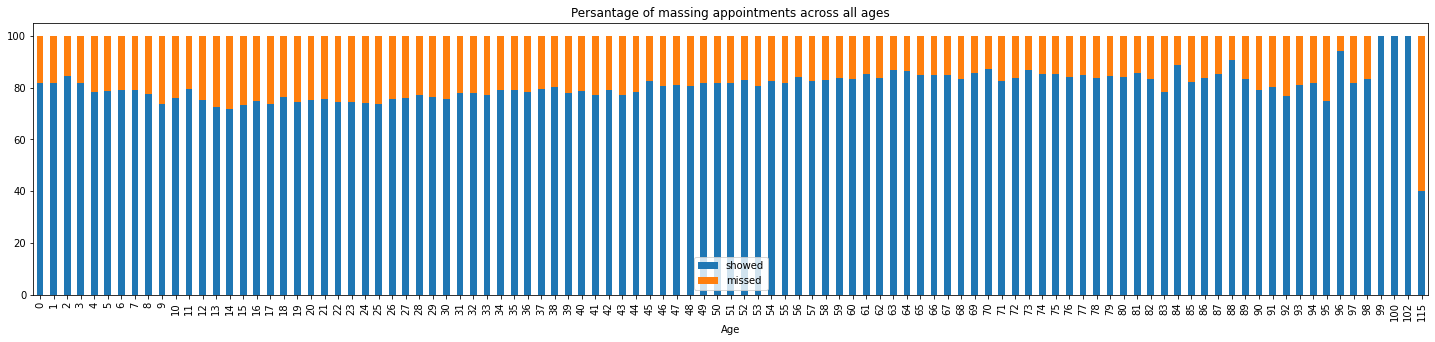

In [45]:
# Stacked bar plot for the patients who missed thier appointment across all ages
round(Age_count / Age_count.groupby(level=0).sum() * 100,2).unstack().plot(kind="bar",stacked=True, figsize=(25,5));
plt.legend(["showed","missed"]);
plt.title("Persantage of massing appointments across all ages");

In [46]:
# The mean value of percentage of age for patient that missing thier appointment
print("The mean value of patient missig the appointment for the age:")
round(Age_count / Age_count.groupby(level=0).sum() * 100,2).unstack().Yes.mean()

The mean value of patient missig the appointment for the age:


19.850300000000008

#### Binning Age
Dividing Age into bins with a width of 10, to get a clear look on each age group:

In [47]:
bins=[0,10,20,30,40,50,60,70,80,90,100,120]
df["Age_bin10"] = pd.cut(df.Age, bins=bins)
Age10_count = df.groupby("Age_bin10")["No-show"].value_counts()

In [48]:
Age10_count

Age_bin10   No-show
(0, 10]     No         12061
            Yes         3149
(10, 20]    No          9791
            Yes         3308
(20, 30]    No         10389
            Yes         3394
(30, 40]    No         11820
            Yes         3232
(40, 50]    No         11550
            Yes         2870
(50, 60]    No         12940
            Yes         2721
(60, 70]    No          9541
            Yes         1648
(70, 80]    No          4832
            Yes          889
(80, 90]    No          2137
            Yes          407
(90, 100]   No           242
            Yes           59
(100, 120]  No             4
            Yes            3
Name: No-show, dtype: int64

Text(0.5, 1.0, 'Prcentage of Missing appointment across ages')

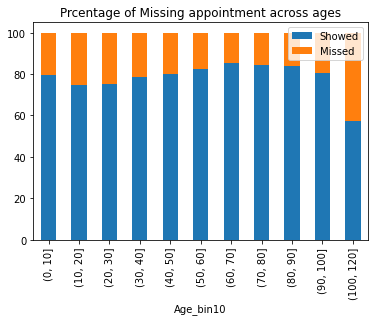

In [49]:
(Age10_count/Age10_count.groupby(level=0).sum()*100).unstack().plot(kind="bar",stacked=True)
plt.legend(["Showed","Missed"]);
plt.title("Prcentage of Missing appointment across ages")

In [50]:
(Age10_count/Age10_count.groupby(level=0).sum()*100)

Age_bin10   No-show
(0, 10]     No         79.296515
            Yes        20.703485
(10, 20]    No         74.746164
            Yes        25.253836
(20, 30]    No         75.375463
            Yes        24.624537
(30, 40]    No         78.527770
            Yes        21.472230
(40, 50]    No         80.097087
            Yes        19.902913
(50, 60]    No         82.625631
            Yes        17.374369
(60, 70]    No         85.271249
            Yes        14.728751
(70, 80]    No         84.460759
            Yes        15.539241
(80, 90]    No         84.001572
            Yes        15.998428
(90, 100]   No         80.398671
            Yes        19.601329
(100, 120]  No         57.142857
            Yes        42.857143
Name: No-show, dtype: float64

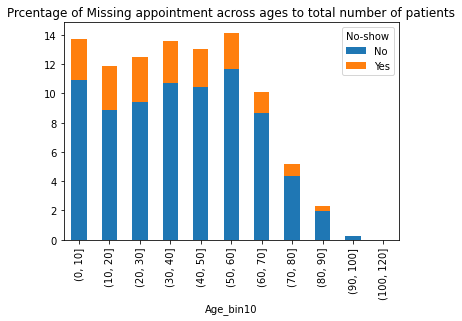

In [51]:
# ratio to all patients
(Age10_count/len(df)*100).unstack().plot(kind="bar",stacked=True);
plt.title("Prcentage of Missing appointment across ages to total number of patients");

In [52]:
#(Age10_count/Age10_count.groupby(level=0).sum()*100).unstack().mean()

In [53]:
#(Age10_count/Age10_count.groupby(level=0).sum()*100).unstack().Yes.hist(bins=30);

### Results:
- **There is no strong corolation between age alone and missing the appointment** : 
    
    The mean of patient missing an appointment across all ages (19.85%) is close to the overall avarge (20.19%)
- After some exploration we could say:
    - **patients from 12 to mid 30s are more likely to miss their appointments**
    - **kids and patients in their 60s, 70s and 80s are more likely to show to their appointments** : The reason for that  could be because there is someone who is taking them to their appointments.


---
### Q2- Is there a correlation between missing the appointment and the Gender of the patient?

In [54]:
Gender_count = df.groupby("Gender")["No-show"].value_counts()
print(Gender_count)

Gender  No-show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: No-show, dtype: int64


The percentage of females who missed their appointment:  20.31
The percentage of males who missed their appointment  :  19.97


Text(0.5, 1.0, 'The percentage of male and females')

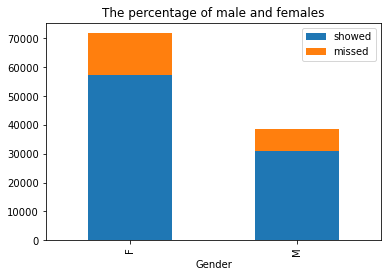

In [55]:
print("The percentage of females who missed their appointment: ",round(Gender_count[1]/(Gender_count[0]+Gender_count[1])*100,2))
print("The percentage of males who missed their appointment  : ",round(Gender_count[3]/(Gender_count[3]+Gender_count[2])*100,2))
df.groupby("Gender")["No-show"].value_counts().unstack().plot(kind="bar",stacked=True)
plt.legend(["showed","missed"]);
plt.title("The percentage of male and females")

#### Results:
- **we could say that there is no corolation between gender alone and missing the appointment.**

    The percentage of male and female patients missing their appointments is the same and same as the general average.
    

----
### Q3- Is there a correlation between missing the appointment and the Neighbourhood?

In [56]:
Neighbourhood_count = df.groupby("Neighbourhood")["No-show"].value_counts()
Neighbourhood_count

Neighbourhood    No-show
AEROPORTO        No            7
                 Yes           1
ANDORINHAS       No         1741
                 Yes         521
ANTÔNIO HONÓRIO  No          221
                            ... 
TABUAZEIRO       Yes         573
UNIVERSITÁRIO    No          120
                 Yes          32
VILA RUBIM       No          710
                 Yes         141
Name: No-show, Length: 160, dtype: int64

In [57]:
round(Neighbourhood_count / Neighbourhood_count.groupby(level=0).sum() * 100,2).unstack()

No-show,No,Yes
Neighbourhood,,
AEROPORTO,87.50,12.50
ANDORINHAS,76.97,23.03
ANTÔNIO HONÓRIO,81.55,18.45
ARIOVALDO FAVALESSA,78.01,21.99
BARRO VERMELHO,78.49,21.51
...,...,...
SÃO JOSÉ,78.35,21.65
SÃO PEDRO,78.96,21.04
TABUAZEIRO,81.70,18.30


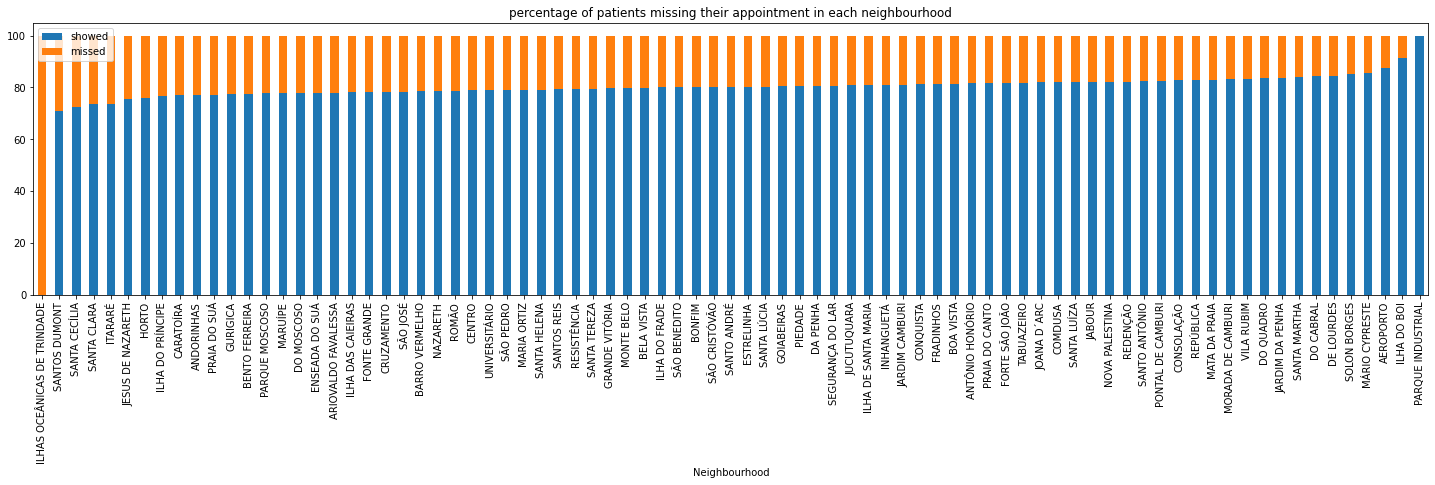

In [58]:
# percentage of patients missing their appointment in each neighbourhood
round(Neighbourhood_count / Neighbourhood_count.groupby(level=0).sum() * 100,2).unstack().sort_values(by="Yes",ascending=False).plot(kind="bar",stacked=True, figsize=(25,5));
plt.legend(["showed","missed"]);
plt.title("percentage of patients missing their appointment in each neighbourhood");

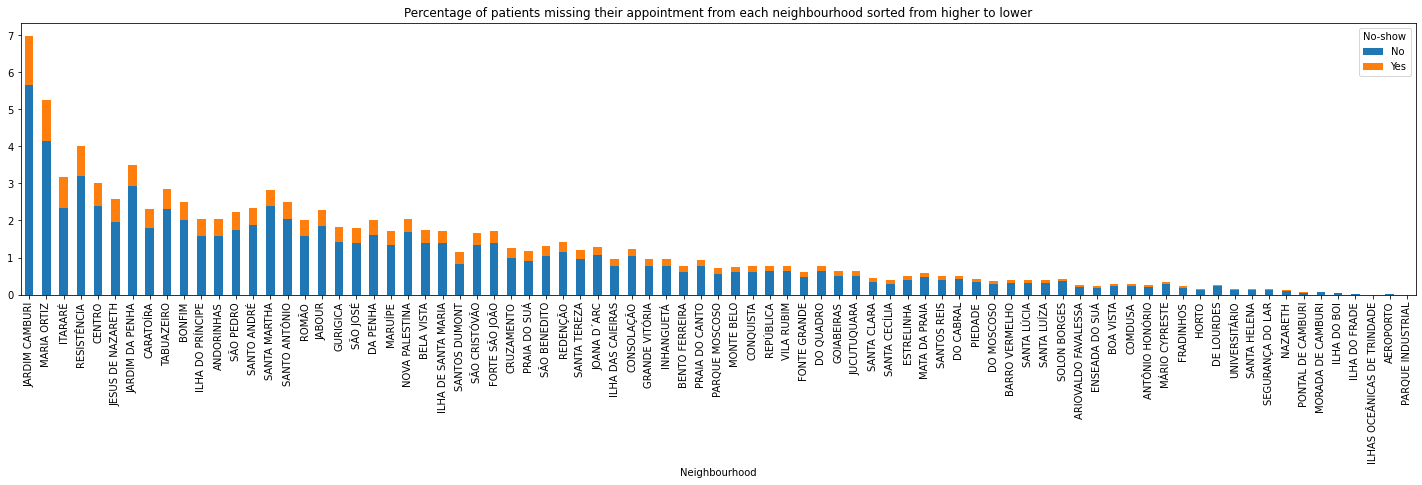

In [59]:
# Percentage of patients missing their appointment from each neighbourhood sorted from higher to lower
round(Neighbourhood_count / len(df) * 100,2).unstack().sort_values(by="Yes",ascending=False).plot(kind="bar",stacked=True, figsize=(25,5));
plt.title("Percentage of patients missing their appointment from each neighbourhood sorted from higher to lower");

In [60]:

print("The mean value for the percentage of patients missing appointments in all neighbourhood:",
      round((Neighbourhood_count / Neighbourhood_count.groupby(level=0).sum() * 100).unstack().Yes.mean(),2))
print("The standard deviation value:",round((Neighbourhood_count / Neighbourhood_count.groupby(level=0).sum() * 100).unstack().Yes.std(),2))

The mean value for the percentage of patients missing appointments in all neighbourhood: 20.8
The standard deviation value: 9.5


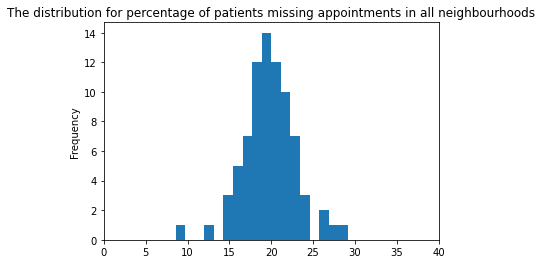

In [61]:
# in this distribution, we removed an outlier value
round(Neighbourhood_count / Neighbourhood_count.groupby(level=0).sum() * 100,2).unstack().Yes.plot(kind="hist",bins=80,xlim=(0,40))
plt.title("The distribution for percentage of patients missing appointments in all neighbourhoods");

### Results:
- Most of the neighborhoods are close to the same general percentage of 20%
- In general, the more patient coming from the neighborhood the more patient will miss their appointments
- The neighborhoods with most patients showing to their appointments have low patients numbers. So, **we couldn't conclude that these neighborhoods have a higher chance that patients won't miss their appointments.**

---
### Q4- Is there a correlation between missing the appointment and not receiving an SMS message?
- As we have shown before the majority of patients didn't recived SMS.

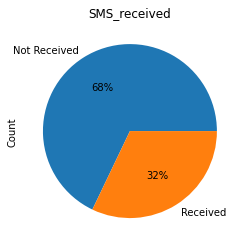

In [62]:
df["SMS_received"].value_counts().plot(kind="pie",labels=["Not Received","Received"],   autopct='%1.0f%%')
plt.ylabel("Count")
plt.title("SMS_received");

- We will check if receiving an SMS get patients to show to their appointments:

In [63]:
SMS_count = df.groupby("SMS_received")["No-show"].value_counts()
SMS_count

SMS_received  No-show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
Name: No-show, dtype: int64

In [64]:
SMS_YN = (SMS_count / SMS_count.groupby(level=0).sum() * 100).unstack()
SMS_YN.index = ["NOt Received", "Received"]
SMS_YN

No-show,No,Yes
NOt Received,83.296466,16.703534
Received,72.425455,27.574545


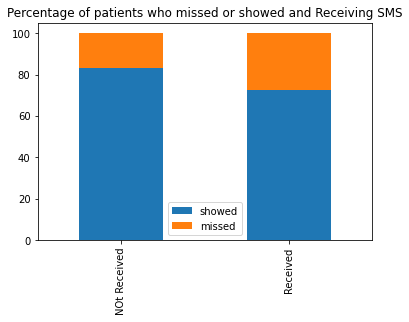

In [65]:
SMS_YN.plot(kind="bar",stacked=True)
plt.legend(["showed","missed"])
plt.title("Percentage of patients who missed or showed and Receiving SMS");

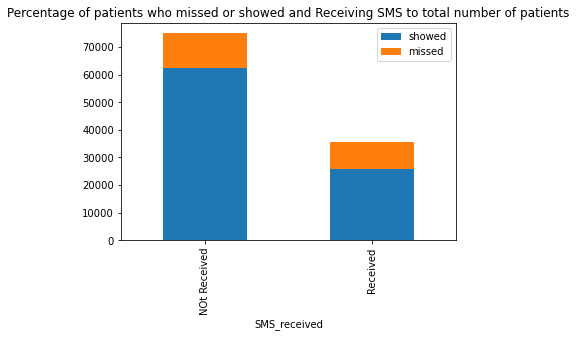

In [66]:
SMS_count.unstack().sort_values(by="Yes",ascending=False).plot(kind="bar",stacked=True).set_xticklabels(["NOt Received", "Received"]);
plt.legend(["showed","missed"])
plt.title("Percentage of patients who missed or showed and Receiving SMS to total number of patients");

In [67]:
# Exploring it the other way, percentage of patients who (recived SMS of not) to (missing or showing)
SMS_Miss = (df.groupby("No-show")["SMS_received"].value_counts()/(df.groupby("No-show")["SMS_received"].value_counts().groupby(level=0).sum()/100)).unstack()
SMS_Miss.columns = ["Not Received", "Received"]
SMS_Miss

,Not Received,Received
No-show,,
No,70.866258,29.133742
Yes,56.162911,43.837089


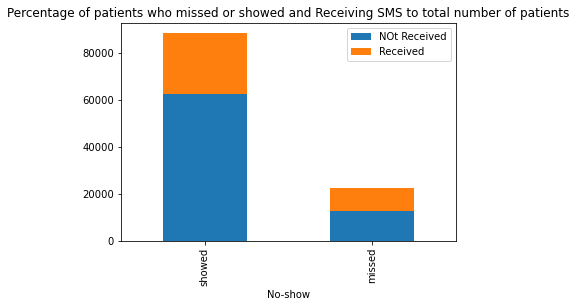

In [68]:
# the percentage of patients who (recived SMS of not) to (missing or showing)
df.groupby("No-show")["SMS_received"].value_counts().unstack().plot(kind="bar",stacked=True).set_xticklabels(["showed","missed"])
plt.legend(["NOt Received", "Received"]);
plt.title("Percentage of patients who missed or showed and Receiving SMS to total number of patients");

### Results:
- Most patients didn't received an SMS.
- The patients who received an SMS have a higher percentage of missing the appointments 27.6% to those who didn't 16.7%.
- For the ptients who missed their appointments, 43% of them received an SMS.
- **According to the data, receiving an SMS, didn't make patients more likely to show to their appointments.**

    

---
### General correlation table between columns

In [69]:
# Convert "No-show" column to binary values by creatind a new column 
df["missed"] = np.where(df["No-show"] == "Yes",1,0)

In [70]:
df.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,missed
PatientId,1.000000,0.004023,-0.004121,-0.002877,-0.006436,0.001608,0.011014,-0.007915,-0.009742,-0.001456
AppointmentID,0.004023,1.000000,-0.019106,0.022619,0.012759,0.022632,0.032946,0.014107,-0.256613,-0.162597
Age,-0.004121,-0.019106,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,-0.060327
Scholarship,-0.002877,0.022619,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,0.029134
Hipertension,-0.006436,0.012759,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,-0.035704
Diabetes,0.001608,0.022632,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,-0.015181
Alcoholism,0.011014,0.032946,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,-0.000197
Handcap,-0.007915,0.014107,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,-0.006077
SMS_received,-0.009742,-0.256613,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,0.126428
missed,-0.001456,-0.162597,-0.060327,0.029134,-0.035704,-0.015181,-0.000197,-0.006077,0.126428,1.000000


___
___
<a id='conclusions'></a>
## Conclusions
We investigated the correlation between some of the characteristics of the patients and whether they missed or showed to their appointment. 
**And these are the results of these analyses:**
- **patients from 12 to mid-30s are more likely to miss their appointments**
- **kids and patients in their 60s, 70s, and 80s are more likely to show to their appointments**
- **There is no correlation between gender alone and missing the appointment.**
- **The neighborhoods with most patients showing to their appointments have low patients numbers. So, we couldn't conclude that these neighborhoods have a higher chance that patients won't miss their appointments.**
- **Receiving an SMS did not increase the chance that the patient would show to their appointment.**

---
<a id='lim'></a>
## limitations
- The period when the data collected was just nearly two months, and this short period doesn't make the data reliable to make a strong correlation
- There was no explanation of how the data was collected, and if it was collected in a way that makes these analyses more reliable.
- The Handcap and SMS_received columns weren't explained clearly on the dataset page.
- The dataset didn't explain why the patient comes to the doctor, which may give an additional explanation about why they miss their appointments.
